In [7]:
import pandas as pd
import glob
import os
import csv
from tqdm import tqdm
import numpy as np

In [3]:
# import sys
# sys.path.insert(0, '../utils')


# added manually in the project settings
# see https://stackoverflow.com/questions/30924664/how-to-manage-sys-path-globally-in-pycharm
from utils.data_utils import load_dataset_to_df

In [10]:
single_file = '../data/iahlt-release-2022-06-09/ne/ar/0a6c17c1a70a50a4aec4323894d138af9c159333f289ad74b98bd3f7a924928a.jsonl.align.tokens.biose'
df = pd.read_csv(
            single_file,
            sep='\t', quoting=csv.QUOTE_NONE, encoding='utf-8',
            skip_blank_lines=False,
            names=["text", "ner"]
        )

In [11]:
df.head()

,text,ner
0,لم,O
1,يأت,O
2,أحد,O
3,NaN,NaN
4,مطار,B-ORG


In [13]:
lFirstName,lLastName = np.load('../data/list_names.npy', allow_pickle=True)
len(lFirstName), len(lLastName)

(24224, 3069)

In [14]:
lUpdFirstName = [x for x in lFirstName if x not in lLastName ]
lUpdLastName  = [x for x in lLastName  if x not in lFirstName]
len(lUpdFirstName), len(lUpdLastName)

(21719, 564)

In [25]:
def labeling(x, lUpdFirstName,lUpdLastName):
    return 'F' if x in lUpdFirstName else 'L' if x in lUpdLastName else 'O'

df['name_label'] = df['text'].apply(lambda x: labeling(x, lUpdFirstName,lUpdLastName,))

In [38]:
df[df['name_label']=='L'].iloc[3]["text"] in lUpdLastName

True

In [36]:
"أول" in lUpdFirstName

False

In [ ]:
path = '../data/iahlt-release-2022-06-09/ne/ar'
df_ar = load_dataset_to_df(path, columns=["text", "ner"], take_first_ner=False)

In [9]:
lFirstName[:5]

['العدرا', 'مطاعم', 'محممود', 'يقظان', 'عزك']

In [ ]:
df_ar.head(30)

In [ ]:
dff = df_ar.apply(lambda x: x if True else 0, axis=1)

In [ ]:
dff.head()

In [ ]:
len(df_ar)

In [ ]:
a

In [ ]:
df_ar= df_ar.loc['PER' in df_ar['ner_labels']]

In [ ]:
df_ar.head()

In [17]:
df_ar= df_ar.loc['PER' in df_ar['ner_labels']]

KeyError: 'False: boolean label can not be used without a boolean index'

In [13]:
df_ar.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
for per_label in ('B-PER', 'I-PER', 'O-PER', 'S-PER', 'E-PER'):
    df_ar[per_label] = df_ar['ner'].apply(lambda x: per_label in x)

In [15]:
df_ar.head()

,text,ner,sentence_id,B-PER,I-PER,O-PER,S-PER,E-PER
0,فقط,O,0,False,False,False,False,False
1,ب,O,0,False,False,False,False,False
2,سبب,O,0,False,False,False,False,False
3,الريح,O,0,False,False,False,False,False
4,اعتراض,O,1,False,False,False,False,False


In [14]:
df_ar.describe(include="all")

,text,ner,sentence_id,B-PER,I-PER,O-PER,S-PER,E-PER
count,803653,803653,803653.000000,803653,803653,803653,803653,803653
unique,48807,707,NaN,2,2,1,2,2
top,ال,O,NaN,False,False,False,False,False
freq,126988,727245,NaN,799632,802138,803653,801264,799632
mean,NaN,NaN,28.338371,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,33.440414,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN


In [41]:
df_ar[df_ar['ner'].str.contains('PER')].sample(10)

,text,ner,sentence_id,ner_sper,B-PER,I-PER,O-PER,S-PER,E_PER
106731,أحمد,B-PER,137,False,True,False,False,False,False
194437,سالا,E-PER|E-ORG,250,False,False,False,False,False,False
758690,ال,I-PER,919,False,False,True,False,False,False
454932,أبو,I-PER,576,False,False,True,False,False,False
618619,غالية,S-PER,764,True,False,False,False,True,False
363276,رامي,B-PER,460,False,True,False,False,False,False
185936,الحاج,I-PER,242,False,False,True,False,False,False
573725,أيمن,B-PER,715,False,True,False,False,False,False
592908,أورلي,B-PER,739,False,True,False,False,False,False
658338,أنس,B-PER,812,False,True,False,False,False,False


In [12]:
dff = df_ar[df_ar['ner'] != 'O']

In [13]:
dff['ner'].head()

11    B-GPE
12    E-GPE
27    B-ORG
28    E-ORG
33    S-ORG
Name: ner, dtype: object

In [14]:
df_ar['ner'].value_counts()

O          726428
I-ORG        9910
B-ORG        5509
E-ORG        5226
S-GPE        4339
B-PER        3933
E-PER        3930
I-TTL        3086
B-TTL        2974
E-TIMEX      2813
B-TIMEX      2736
B-GPE        2396
E-GPE        2362
S-PER        2185
E-TTL        2100
S-ORG        2063
I-TIMEX      2014
I-MISC       1575
I-PER        1478
B-FAC        1428
I-FAC        1358
S-TIMEX      1326
B-MISC       1108
E-MISC       1088
E-FAC        1081
I-GPE        1071
S-MISC       1008
B-LOC         809
E-LOC         741
I-EVE         590
I-LOC         499
B-EVE         457
E-EVE         335
S-LOC         300
B-DUC         296
E-DUC         289
S-DUC         217
I-ANG         194
S-TTL         187
S-EVE         182
I-WOA         172
B-ANG         164
I-DUC         164
E-ANG         164
S-FAC         162
B-WOA         110
E-WOA          97
S-WOA          24
S-ANG           4
Name: ner, dtype: int64

In [15]:
dff = df_ar[df_ar['ner'] != 'O']

<AxesSubplot:>

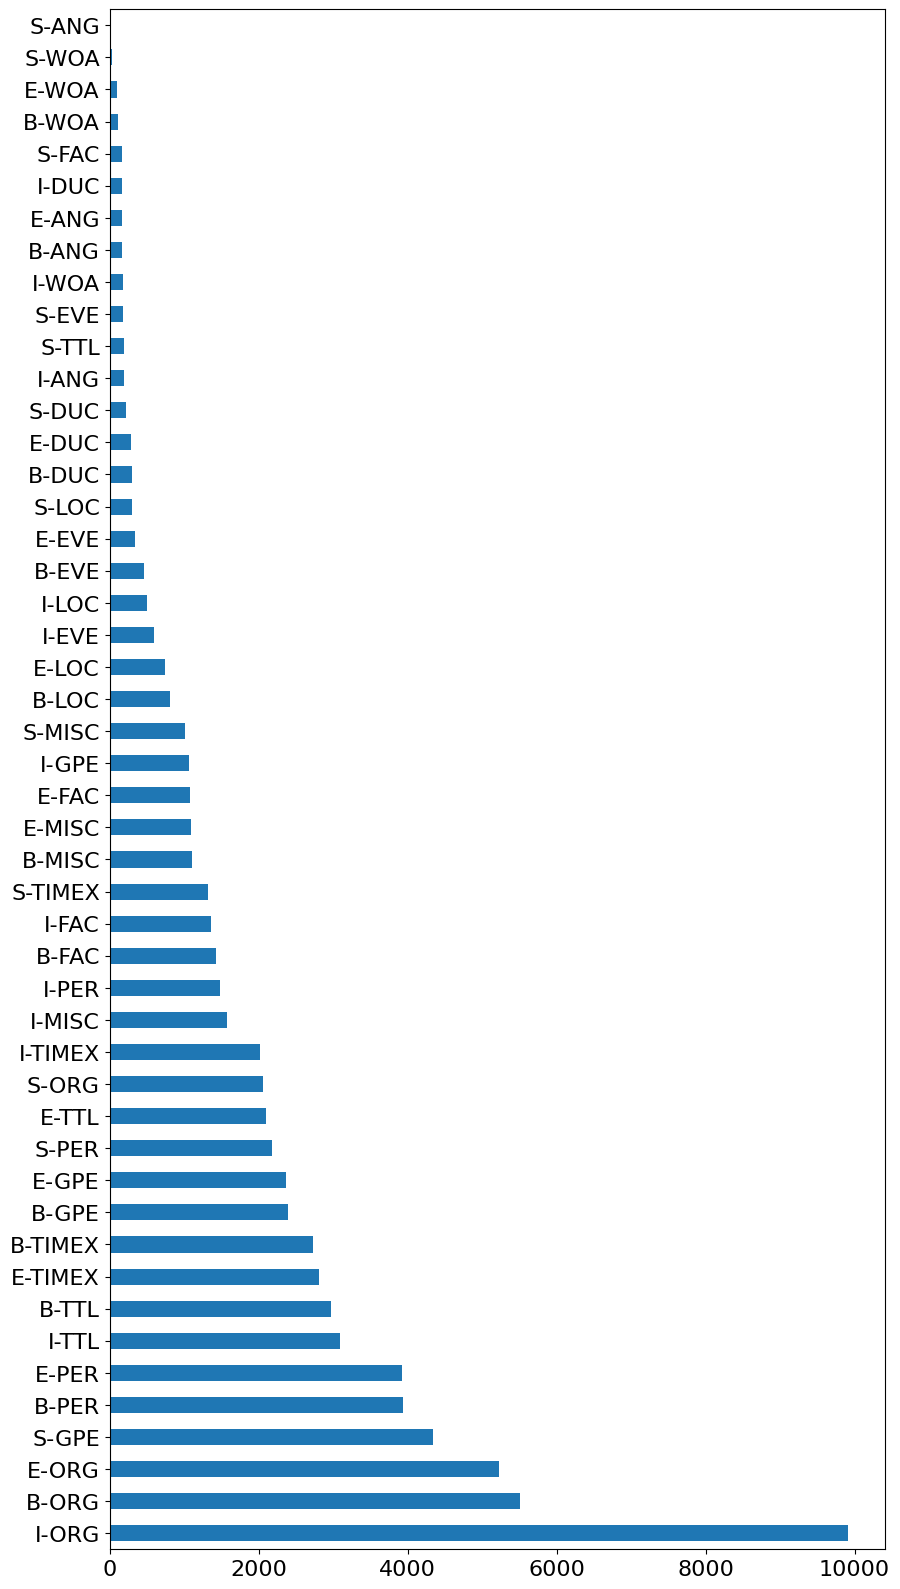

In [22]:
dff['ner'].value_counts().plot(kind='barh', figsize=(10,20), fontsize=16)

In [26]:
df_per = df_ar[df_ar['ner'].str.contains('-PER')]

In [31]:
df_per['ner'].value_counts()

B-PER    3933
E-PER    3930
S-PER    2185
I-PER    1478
Name: ner, dtype: int64

<AxesSubplot:>

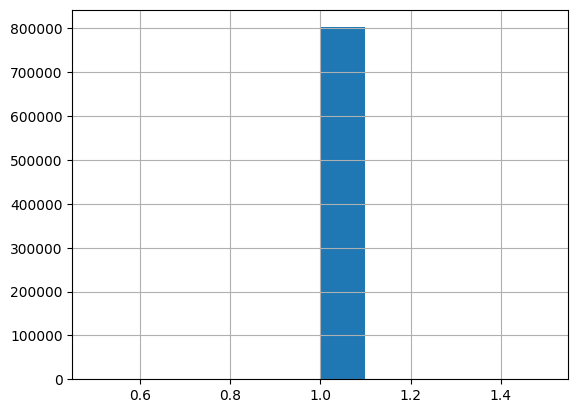

In [9]:
df_ar['ner_splits_len'].hist()

<AxesSubplot:>

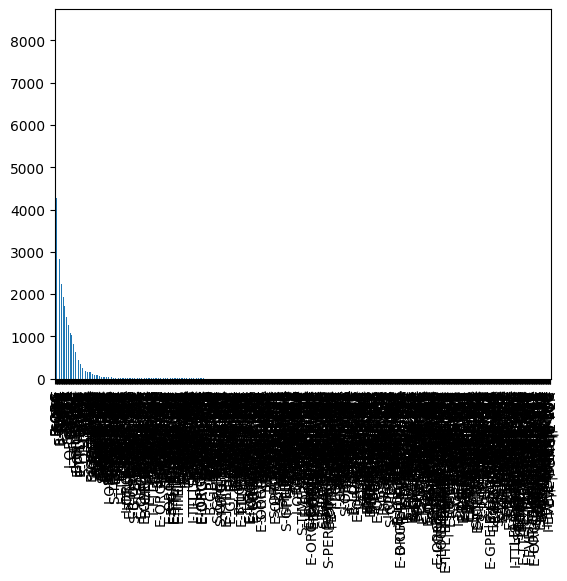

In [29]:
df_ar[df_ar['ner'] != 'O']['ner'].value_counts().plot(kind='bar')

In [10]:
tqdm.pandas()

In [ ]:
import glob
import os
path = '../data/iahlt-release-2022-06-09/ne/he'
all_files = glob.glob(os.path.join(path, "*.biose"))

df = pd.concat(
    (
        pd.read_csv(
            f, sep='\t', on_bad_lines='skip', quoting=csv.QUOTE_NONE, encoding='utf-8',
                 header=0, names=["text", "ner"]
        ) for f in all_files), ignore_index=True)

In [ ]:
df.head()

In [ ]:
len(df)

In [ ]:
ohe = pd.get_dummies(data=df, columns=['ner'])
len(ohe)

In [ ]:
df['ner'].value_counts()

In [ ]:
df[df['ner']=='S-PER']

In [ ]:
def load_dataset_to_df(path, pattern="*.biose", columns=["text", "ner"]):
    all_files = glob.glob(os.path.join(path, pattern))

    res = pd.DataFrame()
    for count, f in enumerate(tqdm(all_files)):
        df = pd.read_csv(
                f, sep='\t', on_bad_lines='skip', quoting=csv.QUOTE_NONE, encoding='utf-8',
                     header=0, names=columns
        )
        df['sentence_id'] = count
        res = pd.concat([res, df])
    return res.reset_index(drop=True)

In [ ]:
path = '../data/iahlt-release-2022-06-09/ne/ar'
df_ar = load_dataset_to_df(path)

In [ ]:
len(df_ar)

In [ ]:
df_ar.head()

In [ ]:
df_ar[df_ar['ner']=='B-PER']

In [ ]:
import googletrans
from googletrans import Translator

In [ ]:
translator = Translator()
translation = translator.translate("Der Himmel ist blau und ich mag Bananen", dest='en')
print(translation.text)

In [ ]:
df_ar['translated_value'] = df_ar['text'].progress_apply(lambda x: translator.translate(x, dest='en').text)


In [ ]:
df_ar['translated_value'] = pd.NaT

In [ ]:
df_ar['translated_value'] = df_ar['text'].progress_apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
len(df_ar) // 100

In [ ]:
df_ar.head()

In [ ]:
batch_size = 1000
nof_batches = (len(df_ar) // batch_size) + 1
for batch_id in range(nof_batches):
    print(batch_id)
    start = batch_id * batch_size
    end = start + batch_size
    df_ar['translated_value'].loc[start:end] = df_ar['text'].loc[start:end].progress_apply(
        lambda x: translator.translate(x, dest='en').text
    )

In [ ]:
df_ar.head(30)

In [ ]:
df_ar['translated_value'].loc[0:10] = df_ar['text'].loc[0:10].progress_apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
df_ar['translated_value'].loc[0:10]

In [ ]:
df_ar.head(20)

In [ ]:
df_ar[df_ar.ner == "S-PER"]

In [17]:
from datasets import load_dataset

dataset = load_dataset("wikiann", "en")

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Dataset wikiann downloaded and prepared to /home/eyalshw/.cache/huggingface/datasets/wikiann/en/1.1.0/4bfd4fe4468ab78bb6e096968f61fab7a888f44f9d3371c2f3fea7e74a5a354e. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
label_names = dataset["train"].data[0:10]

In [23]:
len(label_names)

10

In [24]:
label_names


pyarrow.Table
tokens: list<item: string>
  child 0, item: string
ner_tags: list<item: int64>
  child 0, item: int64
langs: list<item: string>
  child 0, item: string
spans: list<item: string>
  child 0, item: string
----
tokens: [[["R.H.","Saunders","(","St.","Lawrence",...,")","(","968","MW",")"],[";","'","''","Anders","Lindström","''","'"],...,["*Inducted","into","the","United","States",...,"Hall","of","Fame","in","2015"],["Dia","Evtimova","Catalina","Castaño","Dinah","Pfizenmaier","Tatjana","Malek"]]]
ner_tags: [[[3,4,0,3,4,...,0,0,0,0,0],[0,0,0,1,2,0,0],...,[0,0,0,3,4,...,4,4,4,0,0],[1,2,1,2,1,2,1,2]]]
langs: [[["en","en","en","en","en",...,"en","en","en","en","en"],["en","en","en","en","en","en","en"],...,["en","en","en","en","en",...,"en","en","en","en","en"],["en","en","en","en","en","en","en","en"]]]
spans: [[["ORG: R.H. Saunders","ORG: St. Lawrence River"],["PER: Anders Lindström"],...,["ORG: United States Hockey Hall of Fame"],["PER: Dia Evtimova","PER: Catalina Castaño","PER

In [28]:
label_names[3]

[
  [
    [
      "ORG: R.H. Saunders",
      "ORG: St. Lawrence River"
    ],
    [
      "PER: Anders Lindström"
    ],
    ...
    [
      "ORG: United States Hockey Hall of Fame"
    ],
    [
      "PER: Dia Evtimova",
      "PER: Catalina Castaño",
      "PER: Dinah Pfizenmaier",
      "PER: Tatjana Malek"
    ]
  ]
]